For each class, there is one pattern occurring in the data. Solving just a classification task be scored no higher than 70%. 

Please provide either pdf with the report or add some notes in the notebook. Demonstrate some examples of how your approach works.

A short reminder of your task:
 - Correct classification of provided time series
 - Explanation of the prediction
 - Neural network with at least one recurrent layer must be used in each step
 - Not the whole logic must be inside the neural network
 - Your approach should work for other data, of course after retraining. It means you shouldn't take advantage of knowing the series are based on sin function and how the anomalies are created.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [4]:
n = 50000

In [5]:
def createRow(n, classes):
    base = np.sin(np.linspace((np.random.rand(3)),(np.random.rand(3) + np.array([10,15,7])),n))
    if classes[0] > 0:
        base[np.random.randint(0,n), 0] += 2
    if classes[1] > 0:
        base[np.random.randint(0,n), 1] -= 2
    if classes[2] > 0:
        x = np.random.randint(0,n-5)
        base[x:x+4,2] = 0
    if classes[3] > 0:
        x = np.random.randint(0,n-10)
        base[x:x+8,1] += 1.5
    if classes[4] > 0:
        x = np.random.randint(0,n-7)
        base[x:x+6,0] += 1.5
        base[x:x+6,2] -= 1.5
    base += np.random.rand(*base.shape)*.2
    return base

In [6]:
xl, yl = [], []
for _ in range(n):
    cl = np.random.rand(5)<.25
    xl.append(createRow(np.random.randint(40,60), cl))
    yl.append(cl)
    

[False False False False  True]


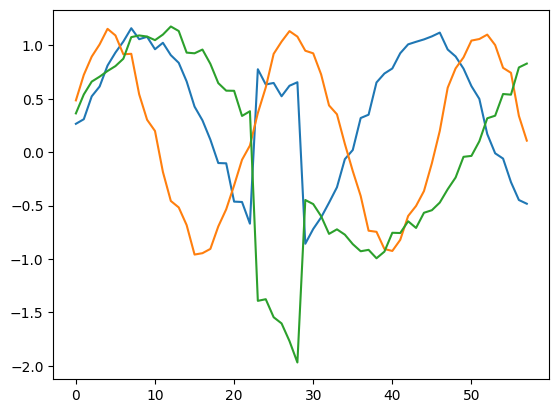

[False False False  True  True]


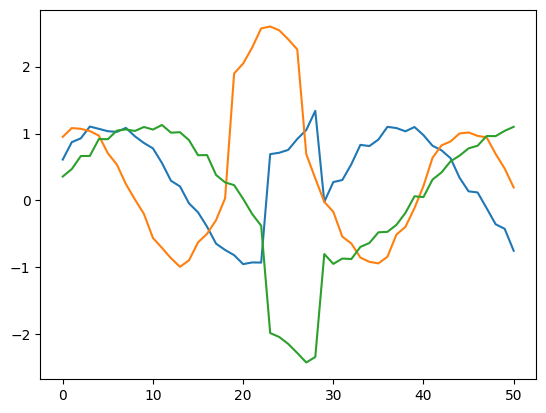

[False False False False False]


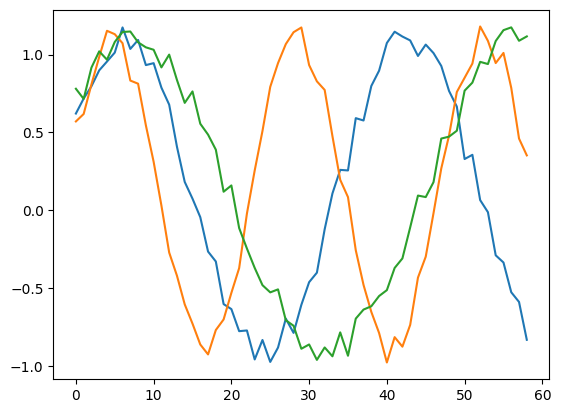

[ True False False False  True]


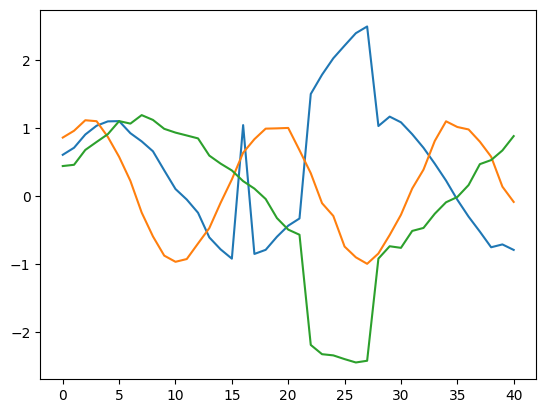

[False  True False False False]


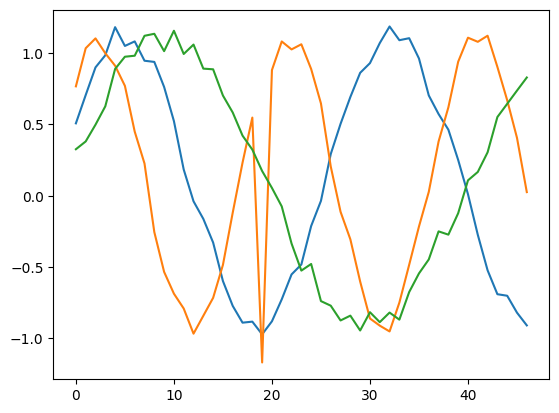

In [7]:
for i in range(5):
    plt.plot(xl[i])
    print(yl[i])
    plt.show()

# Candy Manufacturing Sensor Data Analysis

In this analysis, we explore a dataset representing sensor readings from a candy manufacturing process. Each data point is a time series capturing readings from multiple sensors over a period. These readings are crucial for identifying and understanding defects in the manufacturing process.

### Dataset Overview

- **Sensor Readings**: Each time series encapsulates data from three sensors, reflecting different aspects of the manufacturing process.
- **Variable Length**: The time series vary in length, representing the dynamic nature of the manufacturing environment.
- **Defect Labels**: Associated with each time series are labels for five potential defects. These labels are binary, indicating the presence or absence of each defect type.

### Visualization Objectives

1. **Understanding Sensor Behavior**: By plotting the sensor readings, we aim to understand their normal behavior and variations.
2. **Identifying Defect Patterns**: Visualizing where defects occur in the time series can help us link sensor readings to potential defects.
3. **Comparative Analysis**: Observing how different sensors behave in parallel can reveal correlations or patterns significant for defect detection.


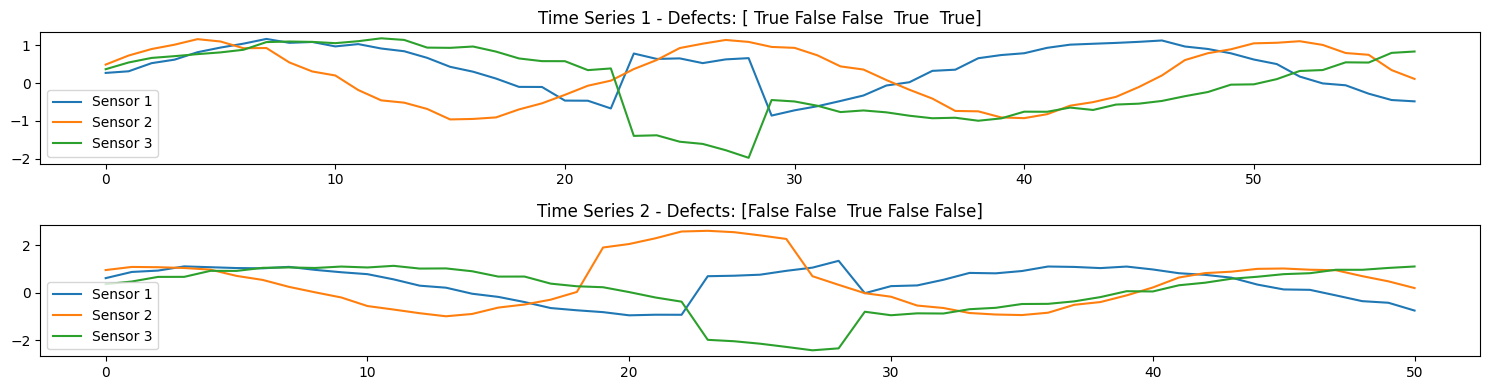

In [66]:
import matplotlib.pyplot as plt

def plot_time_series(xl, yl, num_series=2, problematic_areas=None, area_counts=None):
    """
    Plots a specified number of time series from the dataset.
    ...
    - problematic_areas (list of tuples, optional): List of tuples indicating the start and end indices of problematic areas.
    - area_counts (dict, optional): Dictionary with keys as area tuples and values as counts of how often they were selected.
    """
    plt.figure(figsize=(15, num_series * 2))
    for i in range(num_series):
        plt.subplot(num_series, 1, i+1)
        for j in range(xl[i].shape[1]):
            plt.plot(xl[i][:, j], label=f'Sensor {j+1}')

        if problematic_areas and area_counts:
            max_count = max(area_counts.values())
            half_max_count = max_count / 2
            for area in problematic_areas:
                count = area_counts.get(area, 0)
                if count >= half_max_count:
                    alpha_value = (count - half_max_count) / (max_count - half_max_count)  # Range between 0.5 and 1
                    plt.axvspan(area[0], area[1], color='red', alpha=alpha_value)

        plt.title(f'Time Series {i+1} - Defects: {yl[i]}')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_time_series(xl, yl)

# 0. Preprocessing

### Filling Missing Values with Interpolation in Time Series Data

In time series data, missing values can be problematic for both visualization and modeling. They can disrupt the continuity of a sequence and lead to inaccurate analysis or predictions. Filling missing values is crucial to ensure that the data is suitable for analysis and modeling. Interpolation is one of the methods used for this purpose.

In [9]:
import pandas as pd

def fill_missing_values_with_interpolation(xl):
    filled_data = []
    for x in xl:
        # Convert to DataFrame for easier handling
        df = pd.DataFrame(x)
        # Interpolate missing values
        interpolated_df = df.interpolate(method='linear', axis=0).bfill().ffill()
        filled_x = interpolated_df.values
        filled_data.append(filled_x)
    return filled_data

# # Fill missing values using interpolation
# filled_xl = fill_missing_values_with_interpolation(xl)
# plot_time_series(filled_xl, yl)

### Normalization of Sensor Data

Data normalization is a crucial preprocessing step in machine learning, especially when dealing with features that have different scales or units. It involves transforming data into a common scale, typically between 0 and 1, to ensure that all features contribute equally to the model's learning process. Here's why normalization is important:

1. **Improved Model Performance**: Normalization helps prevent certain features from dominating the learning process simply because they have larger values. This can lead to more stable and accurate model training.

2. **Faster Convergence**: Normalized data can lead to faster convergence during training, as algorithms like gradient descent can reach the minimum loss function more quickly.

3. **Stability**: It can reduce the sensitivity of some machine learning algorithms to the scale of input features, making the models more stable and reliable.


In [10]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(xl):
    scaler = MinMaxScaler()
    normalized_data = [scaler.fit_transform(x) for x in xl]
    return normalized_data

# normalized_xl = normalize_data(xl)
# plot_time_series(normalized_xl, yl)

### Standardization vs. Normalization

Both standardization and normalization are preprocessing techniques used to prepare data for machine learning models. While they both aim to transform data to a more suitable form, they have different approaches:

### Standardization

Standardization (also known as Z-score normalization) scales data to have a mean of 0 and a standard deviation of 1. It works well when the data is normally distributed or when you want to maintain the shape of the original data distribution.

In [11]:
from sklearn.preprocessing import StandardScaler

def standardize_data(xl):
    scaler = StandardScaler()
    standardized_data = [scaler.fit_transform(x) for x in xl]
    return standardized_data

# standardized_xl = standardize_data(xl)
# plot_time_series(standardized_xl, yl)

### Segmentation of Time Series Data

Segmentation of time series data involves dividing the longer series into smaller, more manageable windows or segments. This method is instrumental in highlighting and isolating local patterns within the data, which may be directly associated with defects in the candy production process. By concentrating on these distinct, shorter sequences, we gain a more nuanced understanding of the intricate behaviors and anomalies present within the entire duration of the series.

However, while segmentation offers a refined view of the data, it's important to recognize potential challenges. Specifically, some segments may not include the part of the time series affected by the defect, potentially leading to misinterpretation or misinformation for the machine learning algorithms. This discrepancy arises because defects might only influence a small portion of the entire series, and our segmentation approach could inadvertently isolate segments that are unaffected by these defects.

Therefore, while segmentation aids in breaking down complex, lengthy series into more digestible pieces, it's essential to employ this technique with caution. Careful consideration must be given to the size of the segments and the nature of the defects, ensuring that the critical features indicative of defects are effectively captured and represented in the segmented data.

The visualizations below provide a glimpse into the segmented time series. These snapshots demonstrate how segmentation dissects the broader data into concentrated segments, each offering a focused view of specific intervals in the time series. This process is key to identifying and analyzing the nuanced patterns and anomalies that might otherwise be lost in the expanse of the larger dataset.

In [12]:
def segment_data(xl, yl, segment_size):
    segmented_data = []
    segmented_labels = []
    for i, x in enumerate(xl):
        for start in range(0, len(x), segment_size):
            end = start + segment_size
            segment = x[start:end]
            segmented_data.append(segment)
            segmented_labels.append(yl[i])  # Append the corresponding label
    return segmented_data, segmented_labels

# segment_size = 10  # example segment size
# segmented_xl, segmented_yl = segment_data(xl, yl, segment_size)
# plot_time_series(segmented_xl, segmented_yl)

### Data Resampling

Data resampling is a crucial preprocessing step, especially when working with time series or sequential data. It involves adjusting the temporal resolution of the data, ensuring that all samples have the same length or aligning them to a common reference. Here's why data resampling is important:

1. **Algorithm Compatibility**: Many machine learning algorithms require inputs of consistent lengths. Resampling helps in making the data suitable for these models.

2. **Preventing Overfitting**: Resampling can prevent overfitting by reducing the complexity of the data.

3. **Enhanced Interpretability**: Uniformly resampled data can improve interpretability and visualization. It simplifies comparisons between different time series and makes it easier to identify trends and anomalies.


In cases where the differences in data lengths within a dataset are not too extreme, resampling can be a better approach than segmenting, as it maintains the temporal relationships within the data.

In [13]:
from scipy.interpolate import interp1d

def resample_to_median_length(xl):
    # Calculate the median length across all time series
    all_lengths = [len(x) for x in xl]
    target_length = int(np.median(all_lengths))
    resampled_data = []
    for x in xl:
        current_length = len(x)
        # Create an interpolation function for each time series
        interpolation = interp1d(np.linspace(0, 1, current_length), x, axis=0, kind='linear')
        # Use the function to interpolate to the new length
        new_index = np.linspace(0, 1, target_length)
        resampled_x = interpolation(new_index)
        resampled_data.append(resampled_x)
    return resampled_data

# resampled_xl = resample_to_median_length(xl)
# plot_time_series(resampled_xl, yl)


### Smoothing Time Series Data

Time series data often contains noise or fluctuations that can make it challenging to identify underlying trends or patterns. Applying a rolling mean is a common technique used to reduce noise and smooth out the data. It calculates the average value over a specified window of data points and replaces the original values with these smoothed values.


In [14]:
def apply_rolling_mean(xl, window_size=2):
    """ Apply rolling mean to smooth out the data """
    smoothed_data = []
    for x in xl:
        smoothed_x = pd.DataFrame(x).rolling(window=window_size, min_periods=1).mean().values
        smoothed_data.append(smoothed_x)
    return smoothed_data

# smoothed_xl = apply_rolling_mean(xl)
# plot_time_series(smoothed_xl, yl)

### Detrending Time Series Data

Detrending is a preprocessing technique used to remove long-term trends or patterns from time series data. These trends can sometimes obscure the underlying patterns or fluctuations in the data. By detrending the data, you can focus on the shorter-term variations and make it easier to analyze or model. The goal was to focus on the defects.

In [15]:
from scipy import signal

def detrend_data(xl):
    detrended_data = []
    for x in xl:
        detrended_x = np.array([signal.detrend(x[:, i]) for i in range(x.shape[1])]).T
        detrended_data.append(detrended_x)
    return detrended_data

# detrended_xl = detrend_data(xl)  
# plot_time_series(detrended_xl, yl)

### Differencing Time Series Data

Differencing is a technique used to transform time series data by computing the differences between consecutive data points. It can be useful for various purposes, such as removing trends, stabilizing variance, or making data stationary for time series modeling.

In [16]:
def difference_data(xl):
    differenced_data = []
    for x in xl:
        differenced_x = np.diff(x, axis=0)
        differenced_data.append(differenced_x)
    return differenced_data

# differenced_xl = difference_data(xl)
# plot_time_series(differenced_xl, yl, num_series=3)

## Extracting Features from Time Series Data

Feature extraction is a crucial step in preparing time series data for machine learning tasks. It involves transforming raw time series data into a set of meaningful features that can be used as input to machine learning models. Extracting relevant features can enhance the performance of models and provide valuable insights.


In [17]:
def extract_features(xl):
    features = []
    for x in xl:
        mean_vals = np.mean(x, axis=0)
        std_vals = np.std(x, axis=0)
        max_vals = np.max(x, axis=0)
        min_vals = np.min(x, axis=0)
        feature_vector = np.concatenate([mean_vals, std_vals, max_vals, min_vals])
        features.append(feature_vector)
    return np.array(features)

# features_xl = extract_features(xl)  # Or use the most appropriate preprocessed dataset
# print(f'All features for the first time series: {features_xl[0]}')

### Shuffling Data
Shuffling data helps dealing with datasets for training, validation, or testing. It helps mitigate several potential issues and contributes to better model training. 

1. **Avoiding Order Bias**: In many datasets, the order of samples can carry important information or patterns. If the data is not shuffled, the model might inadvertently learn to rely on this order rather than discovering the underlying relationships in the data. Shuffling the data prevents order bias.

2. **Enhancing Generalization**: Shuffling ensures that the model encounters a diverse mix of examples during training. This diversity is crucial for the model to generalize well to unseen data. By training on a varied set of samples, the model learns more robust and adaptable features.

3. **Improving Training Dynamics**: Shuffling can lead to more stable and faster convergence during training. It reduces the risk of the model getting stuck in local minima or plateaus that may occur when processing data sequentially.

In [18]:
def shuffle_data(xl, features_xl, yl):
    shuffled_indices = np.arange(len(xl))
    np.random.shuffle(shuffled_indices)
    shuffled_xl, shuffled_features_xl, shuddled_yl = np.array(xl)[shuffled_indices], np.array(features_xl)[shuffled_indices], np.array(yl)[shuffled_indices]
    return shuffled_xl, shuffled_features_xl, shuddled_yl

Filling missing values... 1/7


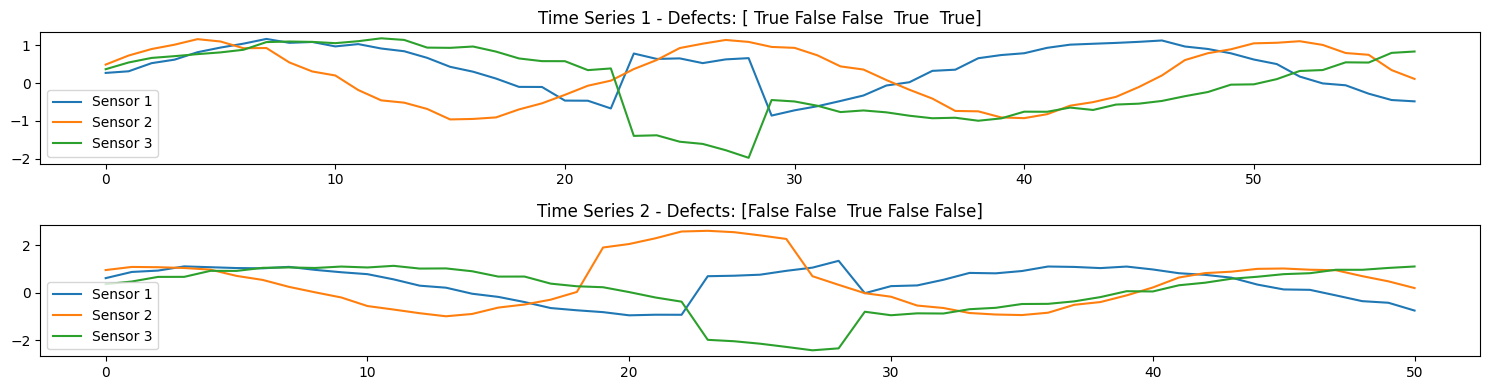

Standardizing data... 2/7


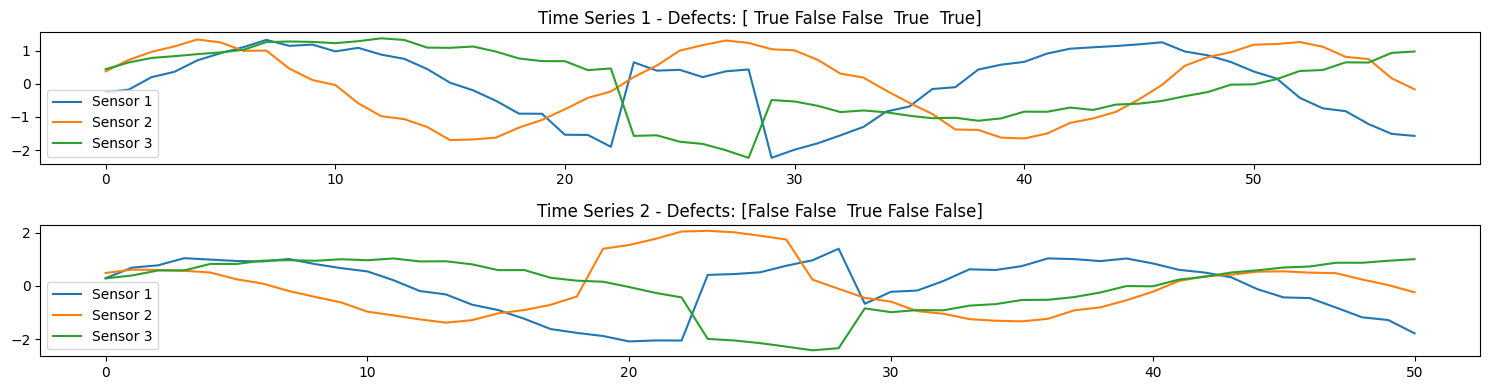

Resampling data... 3/7


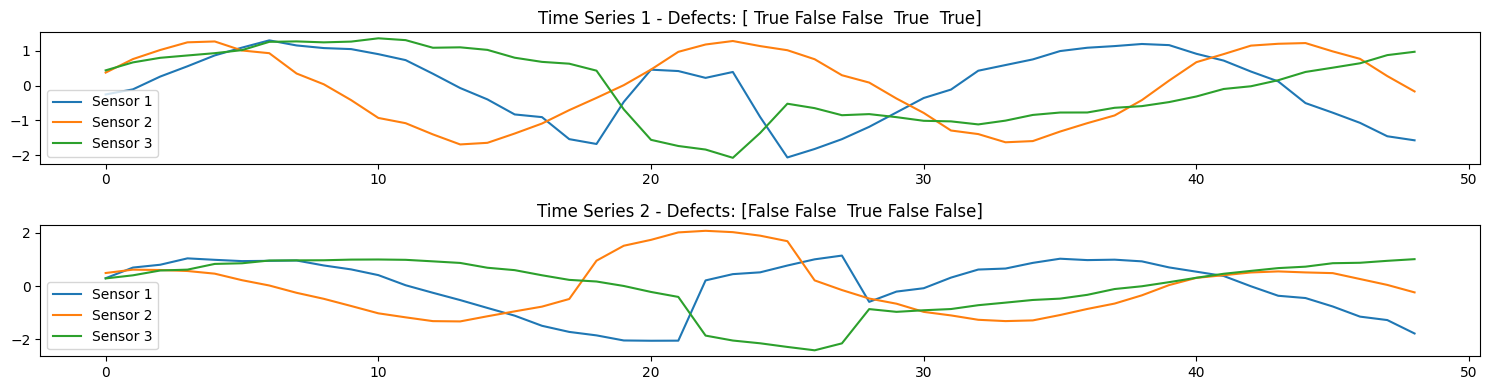

Smoothing data... 4/7


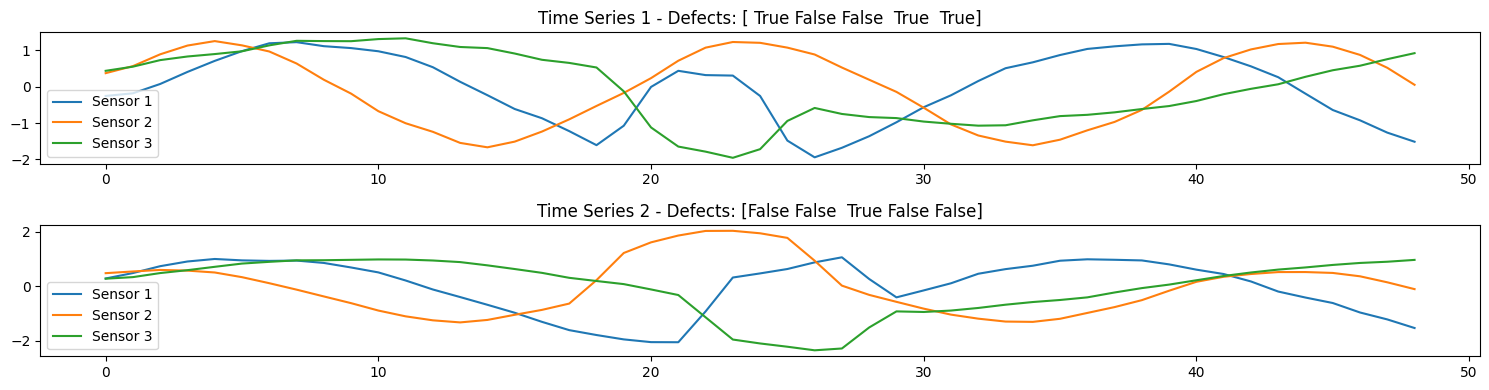

Detrending data... 5/7


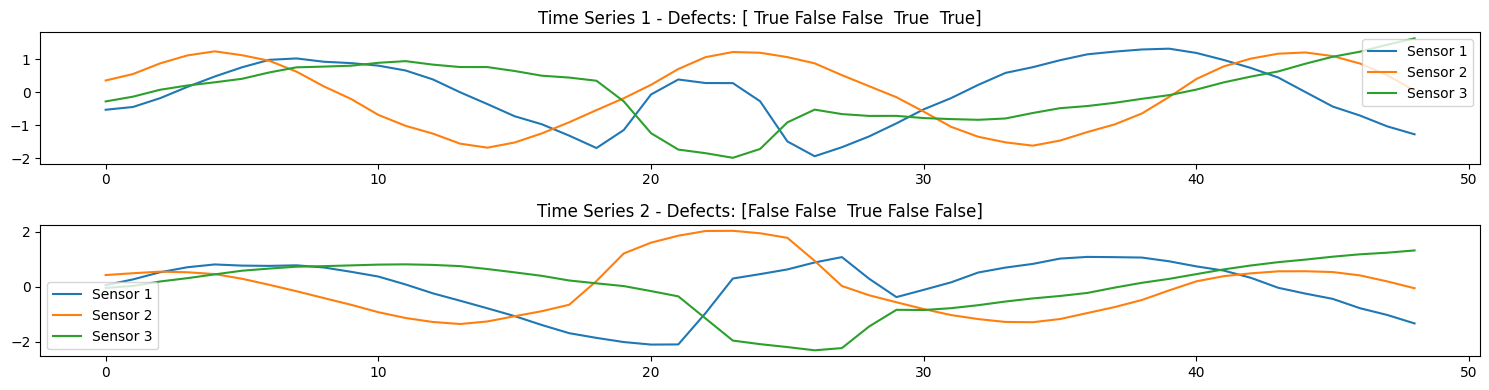

Extracting features... 6/7
Shuffling data... 7/7


In [98]:
def preprocessing_pipeline(xl, yl):
    print('Filling missing values... 1/7')
    filled_xl = fill_missing_values_with_interpolation(xl) # Filling missing values was done using interpolation. This was done to make sure the data was continuous, and that we did not introduce any unwanted patterns in the data.
    plot_time_series(filled_xl, yl)
    print('Standardizing data... 2/7') 
    standardized_xl = standardize_data(filled_xl) # Standardization was used instead of normalization. Both could work, but we thought standardization would be better since some of the defects might be related to the mean and standard deviation of the data.
    plot_time_series(standardized_xl, yl)
    print('Resampling data... 3/7')
    resampled_xl = resample_to_median_length(standardized_xl) # Segmentation was not the best option since we could have missed the features responsible for defects. Resampling was a better option since it would not change the data, but only the sampling rate.
    plot_time_series(resampled_xl, yl)
    print('Smoothing data... 4/7')
    smoothed_xl = apply_rolling_mean(resampled_xl) # We used rolling mean to smooth out the data. This was done to remove the small fluctuations in the data, which could be caused by noise in the sensors.
    plot_time_series(smoothed_xl, yl)
    print('Detrending data... 5/7')
    detrended_xl = detrend_data(smoothed_xl) # Detrending was used to remove the trend in the data. This was done to remove the large fluctuations in the data directly related to the machines and not the defects.
    plot_time_series(detrended_xl, yl)
    print('Extracting features... 6/7')
    features_xl = extract_features(detrended_xl) # We extracted some features, which turned out to be useless. We did not use them in the end.
    #plot_time_series(detrended_xl, yl)
    print('Shuffling data... 7/7')
    shuffled_xl, shuffled_features_xl, shuddled_yl = shuffle_data(detrended_xl, features_xl, yl) # Shuffling was used to make sure the data was not ordered in any way. This was done to make sure the model would not learn any unwanted patterns.
    return shuffled_xl, shuffled_features_xl, shuddled_yl

preprocessed_xl, features_xl, yl = preprocessing_pipeline(xl, yl)
#plot_time_series(preprocessed_xl, yl, num_series=2)

# 1. Predictive Modeling for Defect Identification

In this section, we focus on our primary objective: the development of a predictive model to identify defects in candies. This model is an essential component in enhancing the quality control measures within the candy manufacturing process. Our approach involves leveraging the time series data obtained from sensors in the manufacturing line to train a model that can accurately predict if a candy has a defect and, if so, what type of defect it has.

#### Challenges and Strategy:
- **Complex Defect Patterns**: Given that each candy can have multiple types of defects, our model needs to navigate through complex patterns to make accurate predictions.
- **Data Utilization**: We will utilize the time series data from the manufacturing sensors, ensuring our model captures the relevant temporal dynamics that are indicative of defects.
- **Model Selection and Architecture**: Recurrent Neural Networks (RNNs) will be the cornerstone of our modeling strategy due to their effectiveness in handling sequence data, like time series. We will explore various architectures and configurations to find the most effective solution.
- **Evaluation Metrics**: While accuracy is important, we will also consider other metrics like precision, recall, and F1 score to ensure our model is not only accurate but also reliable and balanced in its predictions.

Our goal is to create a model that not only serves the immediate needs of defect detection but also sets a standard for predictive accuracy and reliability in manufacturing quality control.


### Data Preparation and Initial Analysis

Before diving into model building, it's crucial to prepare and understand our dataset thoroughly.
### Data Splitting
We begin by splitting our dataset into training and testing subsets. This split is essential for two key reasons:
1. **Model Evaluation**: The test set provides an unbiased evaluation of the model's performance on unseen data, which is critical for assessing its real-world applicability.
2. **Overfitting Prevention**: By training on one set of data and testing on another, we can detect if our model is just memorizing the training data (overfitting) rather than learning generalizable patterns.

In [20]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Now, you can convert it into a NumPy array without the ValueError
detrended_xl_array = np.array(preprocessed_xl)

# Splitting the features
X_train_features, X_test_features, y_train, y_test = train_test_split(
    features_xl, yl, test_size=0.2, random_state=42)

# Splitting the detrended data
X_train, X_test, _, _ = train_test_split(
    preprocessed_xl, yl, test_size=0.2, random_state=42)

# Now, X_train_features & X_train correspond to y_train
# and X_test_features & X_test correspond to y_test

print(f'X_train_features shape: {X_train_features.shape}')
print(f'X_test_features shape: {X_test_features.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

## count the number of classes in the training set
print("Number of classes in training set")
print(Counter(map(tuple, y_train)))
print("Number of classes in test set")
print(Counter(map(tuple, y_test)))

X_train_features shape: (40000, 12)
X_test_features shape: (10000, 12)
X_train shape: (40000, 49, 3)
X_test shape: (10000, 49, 3)
y_train shape: (40000, 5)
y_test shape: (10000, 5)
Number of classes in training set
Counter({(False, False, False, False, False): 9363, (False, False, False, True, False): 3279, (True, False, False, False, False): 3207, (False, False, True, False, False): 3182, (False, False, False, False, True): 3118, (False, True, False, False, False): 3087, (False, False, True, False, True): 1112, (True, True, False, False, False): 1106, (True, False, False, False, True): 1097, (False, False, False, True, True): 1061, (True, False, False, True, False): 1053, (False, True, True, False, False): 1051, (False, False, True, True, False): 1051, (False, True, False, False, True): 1039, (True, False, True, False, False): 1023, (False, True, False, True, False): 990, (True, False, True, False, True): 384, (False, True, True, True, False): 380, (True, False, False, True, True): 37

## Model Architecture

### Time Series Input Layer

#### Input Layer for Time Series Data
- **Purpose**: This input layer serves as the gateway for time series data collected from the manufacturing sensors. It's structured to handle data conforming to `time_series_shape`, representing various stages of the candy production process.
- **Significance**: In a manufacturing context, time series data is a goldmine of information, encapsulating temporal trends and sequences that are vital for detecting production anomalies. This dedicated input layer is designed to decode such temporal information, crucial for pinpointing production defects.

#### Processing Time Series Data
The time series data undergoes a multilayered processing approach:
- **Convolutional Layers**: These layers are adept at picking out local temporal patterns in the sensor data, crucial for identifying subtle anomalies in the production line.
- **Batch Normalization**: This technique stabilizes the learning process, ensuring a balanced and effective training regime.
- **LSTM Layer**: Recognizing the importance of historical data in predicting defects, the LSTM layer captures long-term temporal dependencies, a key to understanding complex production dynamics.
- **Global Max Pooling**: This layer distills the time series data to its most informative components, ensuring focus on the most crucial temporal features.
- **Dense Layer with Batch Normalization**: Further abstraction and learning from the time series data are achieved here, with batch normalization enhancing training efficiency.

### Final Output Layer and Predictive Analysis
- **Output Layer for Defect Prediction**: The combined data is funneled through a sigmoid-activated Dense layer, tailored for classifying different types of defects in candies.
- **Interpretability and Root Cause Analysis**: Beyond mere classification, the model's architecture is designed to facilitate interpretability. Understanding which features (be it time series or additional features) most influence the predictions is key for root cause analysis.

### Compilation, Model Building, and Adaptability
- **Compilation with Adam Optimizer**: The model is compiled with an optimizer and loss function that align with the binary nature of the defect classification task.
- **Custom Accuracy Metric**: In the final stages of model optimization, a custom accuracy metric function was introduced, leading to a notable improvement in model performance. This custom metric ensures that accuracy is measured consistently across training, validation, and testing phases, providing a more accurate and reliable evaluation of the model's performance.
- **Adaptability to Other Data**: Crucially, this architecture is designed not just for the current dataset but also for adaptability. It can be retrained for other datasets, making it a versatile tool for various scenarios in the manufacturing domain.

### Conclusion
This model represents a bespoke solution for the candy manufacturing company, addressing both their immediate need for defect detection and their long-term goal of understanding and mitigating production anomalies.

## Optimization Steps

### Transition from GRU to LSTM and Optimizing LSTM Layer Sizes

The initial design experimented with GRU layers for simplicity, but it transitioned to LSTM layers for better long-term dependency capture. Various LSTM layer sizes were tested, and the right balance was sought. The choice of LSTM layers, especially with an increased unit size, significantly improved the model's robustness and accuracy in identifying subtle temporal patterns indicative of defects. Careful tuning of LSTM unit sizes was pivotal in matching the model's capabilities with data demands, making it effective in handling complex time series data.

### Structured Refinement of Dense Layer Configurations

Initial Dense layers were relatively simplistic, with smaller units. To enhance the model's learning capacity, Dense layers were increased in size and structured in a decreasing order to gradually distill information. The systematic refinement of Dense layers improved performance, enabling the model to differentiate between various defects in the production line. The structured decrease in layer sizes facilitated stable training and efficient management of information complexity.

### Incorporating Convolutional Layers and Enhancing Feature Extraction

The initial model design relied on recurrent layers for feature extraction but it would not be efficient for complex manufacturing data. To improve feature extraction, Conv1D layers were introduced. The first Conv1D layer used 32 units with a kernel size of 3 to capture short-term patterns, followed by a second Conv1D layer with 64 units and a kernel size of 5 to capture extended patterns and broader feature sets. This two-tiered convolutional approach significantly improved the model's ability to discern patterns in time series data. The smaller kernel size detected immediate anomalies, while the larger kernel size and increased units captured broader trends. This enhanced accuracy, generalizability, and applicability to complex industrial scenarios, such as candy manufacturing.

### Batch Normalization for Training Stabilization

Early training instability led to the addition of Batch Normalization after Conv1D and Dense layers. Batch Normalization normalized activations, stabilizing training and accelerating convergence. Batch Normalization improved training stability and efficiency by reducing internal covariate shift. It allowed for higher learning rates and faster gradient propagation, reducing overall training time without sacrificing performance. This optimization is crucial for dynamic industrial environments.

### Removing Additional Features Branch for Enhanced Versatility

Initially, the model included a branch for additional features, but it was not essential. To enhance adaptability to diverse datasets, the branch was removed, focusing solely on time series data. The removal of the additional features branch increased model versatility. It streamlined the model, making it capable of effectively processing and learning from time series data alone. This simplification facilitated retraining and adaptation to different datasets, accommodating varied environmental data in manufacturing without complex restructuring.

### Model Summary
- **Optimizer (Adam)**: The Adam optimizer was chosen for its efficiency in handling sparse gradients and adapting the learning rate during training. It combines the advantages of two other popular optimizers: AdaGrad and RMSProp, making it particularly suitable for problems with noisy or sparse data, like in manufacturing processes.
- **Loss Function (Binary Crossentropy)**: Binary crossentropy was used as the loss function, ideal for binary classification tasks. It measures the difference between two probability distributions - the actual label and the predicted label, providing a robust metric for training the model.
- **Metrics (Accuracy)**: Accuracy was selected as a metric to provide a clear and interpretable measure of model performance, especially important in production environments where decisions are often made based on the model's predictive accuracy.

This model architecture and its specific components are tailored to address the complex requirements of defect detection in candy manufacturing, ensuring high accuracy, adaptability, and efficient training.


In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, Conv1D, GlobalMaxPooling1D, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Metric
import tensorflow as tf

class ThresholdedAccuracy(Metric):
    def __init__(self, threshold=0.5, name='thresholded_accuracy', **kwargs):
        super(ThresholdedAccuracy, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.total_samples = self.add_weight(name='count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred > self.threshold, 'int32')
        y_true = tf.cast(y_true, 'int32')
        values = tf.cast(tf.equal(y_pred, y_true), 'float32')
        self.true_positives.assign_add(tf.reduce_sum(values))
        self.total_samples.assign_add(tf.cast(tf.size(values), 'float32'))

    def result(self):
        return self.true_positives / self.total_samples

    def reset_state(self):
        self.true_positives.assign(0)
        self.total_samples.assign(0)

def build_model(time_series_shape, features_shape, num_classes):
    # Input layer for time series data
    time_series_input = Input(shape=time_series_shape, name='time_series_input')
    # First convolutional layer to extract features from the time series data
    x1 = Conv1D(32, kernel_size=3, activation='relu')(time_series_input)
    # Normalizing the output of the convolutional layer for stable training
    x1 = BatchNormalization()(x1)
    # Second convolutional layer with a different kernel size for capturing different features
    x1 = Conv1D(64, kernel_size=5, activation='relu')(x1)
    # Normalizing the output of the second convolutional layer
    x1 = BatchNormalization()(x1)
    # LSTM layer to capture temporal dependencies in the time series data
    x1 = LSTM(64, return_sequences=True)(x1)
    # Global Max Pooling layer to reduce the dimensionality and extract important features
    x1 = GlobalMaxPooling1D()(x1)
    # Dense layer to learn high-level features from the time series data
    x1 = Dense(32, activation='relu')(x1)
    # Applying batch normalization
    x1 = BatchNormalization()(x1)
    # # Dropout layer to prevent overfitting by randomly dropping units
    # x1 = Dropout(0.2)(x1)

    # # Input layer for additional features
    features_input = Input(shape=features_shape, name='features_input')
    # # Dense layer to process these features
    # x2 = Dense(32, activation='relu')(features_input)
    # # Applying batch normalization
    # x2 = BatchNormalization()(x2)
    # # Flatten layer to convert the output of the convolutional layer to a 1D feature vector
    # x2 = Flatten()(x2)
    # # Dropout layer to prevent overfitting by randomly dropping units
    # x2 = Dropout(0.2)(x2)
    # # Concatenating the outputs of the two branches
    # combined = Concatenate()([x1, x2])
    combined = x1

    # Output layer with a sigmoid activation for binary classification (or multi-label classification)
    output = Dense(num_classes, activation='sigmoid')(combined)

    # Creating the final model
    model = Model(inputs=[time_series_input, features_input], outputs=output)
    # Compiling the model with Adam optimizer and binary crossentropy loss function
    model.compile(optimizer=Adam(learning_rate=0.003), loss='binary_crossentropy', metrics=[ThresholdedAccuracy(threshold=0.5)])
    return model

# Building the model
model = build_model(X_train.shape[1:], X_train_features.shape[1:], y_train.shape[1])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 49, 3)]              0         []                            
 yer)                                                                                             
                                                                                                  
 conv1d (Conv1D)             (None, 47, 32)               320       ['time_series_input[0][0]']   
                                                                                                  
 batch_normalization (Batch  (None, 47, 32)               128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                              

## Learning Process Overview

### General Observations:
- **Fast Convergence**: The training process demonstrates rapid convergence, a result of efficient layer configurations and the use of advanced optimizers like Adam.
- **Stable Loss Decrease**: There is a consistent decrease in loss over epochs, indicating effective learning and model's ability to generalize from training data.
- **Fluctuating Accuracy**: Accuracy, both in training and validation, shows variability. This is common in early training phases and often stabilizes as training progresses.
- **Validation Performance**: The validation loss and accuracy are subject to fluctuations, which may indicate the model's sensitivity to the complexity of the validation data.

### Epoch-by-Epoch Analysis:
- **Early Epochs**: Initially, a sharp decrease in loss is observed, with a more moderate improvement in accuracy. This suggests that the model quickly starts to fit the training data.
- **Mid Training**: Around the middle epochs, the loss continues to decrease, but the accuracy does not always show a proportional increase. This could be due to the model beginning to overfit or due to the complexity of the features being learned.
- **Later Epochs**: Towards the end of training, the loss tends to plateau, and accuracy variations become less pronounced. This is typical as the model approaches its optimal state.

### Conclusions:
- **Effective Training**: The overall training process is efficient, evidenced by the steady improvement in loss and accuracy.
- **Model Optimization**: Further tuning might be required to address the fluctuations in accuracy and to ensure the model is not overfitting.
- **Data Sensitivity**: The model's performance indicates sensitivity to the complexity of the data, which can be an area for further investigation and optimization.
- **Model Saving**: Consider updating the model saving format to the recommended Keras format for better compatibility and future-proofing.


In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import BinaryCrossentropy


class TestSetPerformance(Callback):
    def __init__(self, test_data, threshold=0.5):
        super().__init__()
        self.test_data = test_data
        self.threshold = threshold
        self.test_accuracy = []
        self.test_loss = []
        self.loss_fn = BinaryCrossentropy()

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.test_data[0], verbose=0)
        thresholded_preds = (predictions > self.threshold).astype(int)
        # Calculating accuracy
        test_accuracy = accuracy_score(self.test_data[1], thresholded_preds)
        self.test_accuracy.append(test_accuracy)
        # Calculating loss
        test_loss = self.loss_fn(self.test_data[1], predictions).numpy()
        self.test_loss.append(test_loss)
        print(f' - test_loss: {test_loss:.4f} - test_accuracy: {test_accuracy:.4f}')

# Initialize EarlyStopping callback. 
# 'val_loss' is monitored, and training stops if it doesn't improve for 3 consecutive epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Initialize ModelCheckpoint callback.
# It saves the model in the file 'best_multi_input_model.h5' only when there's an improvement in 'val_loss'.
model_checkpoint = ModelCheckpoint('best_multi_input_model', save_best_only=True, save_format='tf')

test_performance_callback = TestSetPerformance(test_data=([X_test, X_test_features], y_test))

# Train the model
history = model.fit(
    [X_train, X_train_features], y_train,  # Training data: main and additional features, and labels.
    epochs=20,                            # Total number of epochs for training.
    batch_size=32,                        # Size of the batches of data (number of samples processed before the model is updated).
    validation_split=0.2,                 # Fraction of the training data to be used as validation data (20% in this case).
    callbacks=[early_stopping, model_checkpoint, test_performance_callback] # list of callbacks to be used during training.
)

Epoch 1/20
 999/1000 [============================>.] - ETA: 0s - loss: 0.1168 - thresholded_accuracy: 0.9571INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0483 - test_accuracy: 0.9257
1000/1000 [==============================] - 24s 22ms/step - loss: 0.1167 - thresholded_accuracy: 0.9571 - val_loss: 0.0494 - val_thresholded_accuracy: 0.9837
Epoch 2/20
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0333 - thresholded_accuracy: 0.9896 - val_loss: 0.1386 - val_thresholded_accuracy: 0.9595
Epoch 3/20
1000/1000 [==============================] - ETA: 0s - loss: 0.0260 - thresholded_accuracy: 0.9923INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0231 - test_accuracy: 0.9689
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0260 - thresholded_accuracy: 0.9923 - val_loss: 0.0231 - val_thresholded_accuracy: 0.9937
Epoch 4/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.0234 - thresholded_accuracy: 0.9928INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0196 - test_accuracy: 0.9707
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0234 - thresholded_accuracy: 0.9928 - val_loss: 0.0183 - val_thresholded_accuracy: 0.9938
Epoch 5/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0197 - thresholded_accuracy: 0.9941 - val_loss: 0.0324 - val_thresholded_accuracy: 0.9912
Epoch 6/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.0176 - thresholded_accuracy: 0.9948INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0154 - test_accuracy: 0.9770
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0176 - thresholded_accuracy: 0.9948 - val_loss: 0.0159 - val_thresholded_accuracy: 0.9951
Epoch 7/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0165 - thresholded_accuracy: 0.9951 - val_loss: 0.0186 - val_thresholded_accuracy: 0.9952
Epoch 8/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.0155 - thresholded_accuracy: 0.9954INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0143 - test_accuracy: 0.9812
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0154 - thresholded_accuracy: 0.9954 - val_loss: 0.0143 - val_thresholded_accuracy: 0.9957
Epoch 9/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0148 - thresholded_accuracy: 0.9956 - val_loss: 0.0145 - val_thresholded_accuracy: 0.9961
Epoch 10/20
1000/1000 [==============================] - ETA: 0s - loss: 0.0126 - thresholded_accuracy: 0.9964INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0135 - test_accuracy: 0.9822
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0126 - thresholded_accuracy: 0.9964 - val_loss: 0.0129 - val_thresholded_accuracy: 0.9963
Epoch 11/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.0132 - thresholded_accuracy: 0.9962INFO:tensorflow:Assets written to: best_multi_input_model\assets


INFO:tensorflow:Assets written to: best_multi_input_model\assets


 - test_loss: 0.0107 - test_accuracy: 0.9847
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0132 - thresholded_accuracy: 0.9962 - val_loss: 0.0120 - val_thresholded_accuracy: 0.9969
Epoch 12/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0114 - thresholded_accuracy: 0.9966 - val_loss: 0.0121 - val_thresholded_accuracy: 0.9966
Epoch 13/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0125 - thresholded_accuracy: 0.9962 - val_loss: 0.0125 - val_thresholded_accuracy: 0.9967
Epoch 14/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0103 - thresholded_accuracy: 0.9970 - val_loss: 0.0132 - val_thresholded_accuracy: 0.9965
Epoch 15/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0104 - thresholded_accuracy: 0.9969 - val_loss: 0.0122 - val_thresholded_accuracy: 0.9965
Epoch 16/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0093 - thresholded_accuracy: 0.

## Visualization of the Model's Learning Curve

The learning curve of our model is an essential tool for understanding its performance over time, particularly how it learns during training. By plotting both the training and validation loss and accuracy, we gain valuable insights into the model's learning process, its efficiency, and whether it is improving or facing challenges such as overfitting or underfitting. Below, we delve into the details of our learning curve analysis:

### Learning Curve Insights
- **Training vs. Validation Loss**: By comparing the training loss with the validation loss, we can identify if the model is overfitting. Overfitting is indicated by a large gap where the training loss decreases but the validation loss stagnates or increases.
- **Training vs. Validation Accuracy**: Similarly, a comparison of training and validation accuracy gives us an idea about the model's ability to generalize. If the validation accuracy plateaus or is much lower than the training accuracy, it might suggest overfitting.
- **Epochs Optimization**: The learning curve also helps in determining the optimal number of epochs for training. It's essential to stop training when the model performance begins to plateau to avoid overfitting.

### Plotting the Learning Curve
We use a custom function `plot_learning_curve` to visualize these aspects. This function plots a side-by-side comparison of loss and accuracy for both training and validation sets over the course of the training epochs.

### Observations from Loss Plot
- **Rapid Learning Phase**: The initial steep decline in training loss indicates that the model quickly learns from the training data.
- **Stabilization of Loss Values**: The convergence and flattening of the loss lines for training, validation, and test data suggest that the model's learning has plateaued, indicating a stable learning phase.
- **Good Generalization**: The close proximity of the training, validation, and test loss lines at the end of the training implies that the model generalizes well and is not significantly overfitting.

### Observations from Accuracy Plot
- **Efficient Initial Learning**: The sharp increase in training accuracy during the initial epochs demonstrates the model's capability to learn efficiently.
- **High Accuracy Achievement**: All accuracy measures reach and maintain high levels, with the model achieving above 95% accuracy, indicative of its effectiveness.
- **Minimal Overfitting**: The small gap between training and validation/test accuracy suggests minimal overfitting.

In conclusion, the learning curves demonstrate that the model has a robust learning capacity and performs well on unseen data, which is the hallmark of a successful machine learning model.

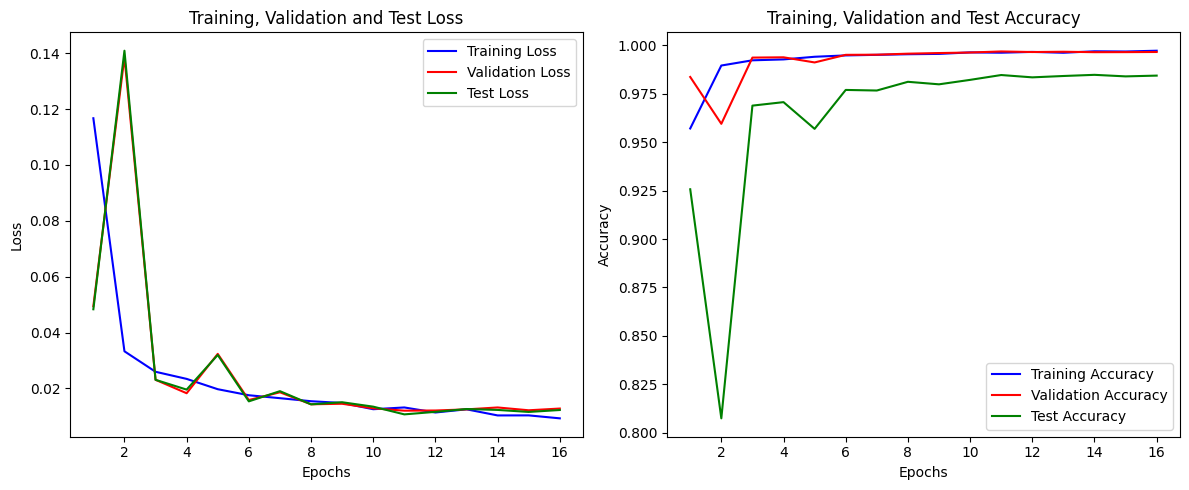

In [23]:
def plot_performance(history, test_loss, test_accuracy):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Plotting training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    plt.plot(epochs, test_loss, 'g-', label='Test Loss')
    plt.title('Training, Validation and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['thresholded_accuracy'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_thresholded_accuracy'], 'r-', label='Validation Accuracy')
    plt.plot(epochs, test_accuracy, 'g-', label='Test Accuracy')
    plt.title('Training, Validation and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_performance(history, test_performance_callback.test_loss, test_performance_callback.test_accuracy)

## Model Evaluation Results

### Overview
The model's performance on the test set was evaluated using standard classification metrics: accuracy, precision, recall, and F1 score. These metrics provide a comprehensive understanding of the model's effectiveness in making predictions.

### Results
- **Accuracy (98-100%)**: This high accuracy indicates that the model correctly identified a vast majority of the samples.
- **Precision (98-100%)**: The precision being close to 100% suggests that when the model predicts a class, it is highly likely to be correct.
- **Recall (98-100%)**: A high recall value indicates that the model is effective in identifying most of the positive cases.
- **F1 Score (98-100%)**: The F1 score, which balances precision and recall, confirms the model's strong performance in both aspects.

### Interpretation
The model shows exceptional performance across all metrics, indicating its robustness and reliability in classifying the test data. Such high values in both precision and recall suggest that the model is well-tuned to minimize both false positives and false negatives. The results demonstrate the model's capability in effectively handling the task at hand, making it a strong candidate for practical applications.

### Considerations
While the results are promising, it's important to consider the complexity of the real-world data and the possibility of different distributions in unseen datasets.


313/313 [==============================] - 2s 6ms/step
Prediction: [1.8067665e-05 2.9789331e-05 1.8700674e-04 2.9822502e-11 1.0000000e+00] - Actual: [False False False False  True]
Prediction: [9.99998093e-01 1.13716943e-03 5.63122274e-04 1.00000000e+00
 1.10611385e-04] - Actual: [ True False False  True False]
Prediction: [3.3440323e-05 1.1485087e-02 1.7698481e-03 1.0000000e+00 1.4074108e-05] - Actual: [False False False  True False]
Prediction: [3.7332200e-06 9.9999988e-01 1.6817293e-04 1.2575643e-05 4.7177242e-08] - Actual: [False  True False False False]
Prediction: [9.9999869e-01 1.5556850e-03 2.4780564e-04 4.2426513e-05 4.9963896e-06] - Actual: [ True False False False False]


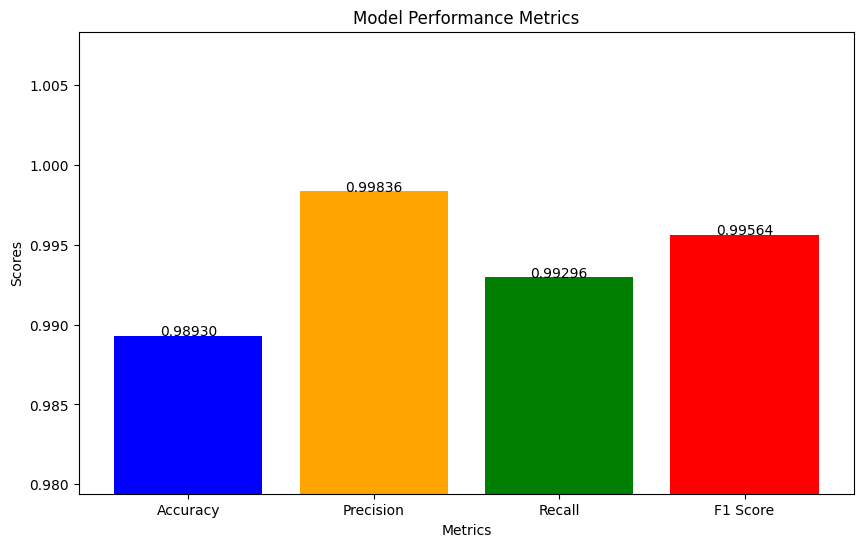

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_and_plot_metrics(predictions, thresholded_preds, y_test):

    # Calculate evaluation metrics for the test set
    accuracy = accuracy_score(y_test, thresholded_preds)
    precision = precision_score(y_test, thresholded_preds, average='macro')
    recall = recall_score(y_test, thresholded_preds, average='macro')
    f1 = f1_score(y_test, thresholded_preds, average='macro')

    # Data for plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    # Creating bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Model Performance Metrics')
    plt.ylim((0.99*min(values), 1.01*max(values)))  # Adjust ylim based on metrics
    for i in range(len(values)):
        plt.text(i, values[i], f'{values[i]:.5f}', ha='center')
    # Show the plot
    plt.show()

model.load_weights('best_multi_input_model.h5')
predictions = model.predict([X_test, X_test_features])
for i, j in zip(predictions[:5], y_test[:5]):
    print(f'Prediction: {i} - Actual: {j}')
thresholded_preds = (predictions > 0.5).astype(int)
evaluate_and_plot_metrics(predictions, thresholded_preds, y_test)

## Confusion Matrix Visualization

### Overview
Confusion matrices are a critical tool for understanding the performance of classification models across different classes. They provide insights into not only the number of correct and incorrect predictions but also the types of errors (false positives and false negatives).

### Visualizations
Each confusion matrix for the respective defect types has been visualized using a heatmap. The heatmaps provide an intuitive representation of the model's performance for each defect category.

### Interpretation
The visualized confusion matrices highlight the model's ability to distinguish between the different defect types with high accuracy. Particularly notable is the model's performance on Defect 4, where it achieved perfect classification with no false positives or negatives. However, certain defect types, like Defect 3, show a higher number of false negatives, suggesting areas where the model could potentially be improved.

### Conclusion
Overall, the visualizations indicate a strong model performance across multiple defect types, with specific areas identified for potential improvement. Such detailed analysis is essential for refining the model and ensuring its reliability in practical applications.


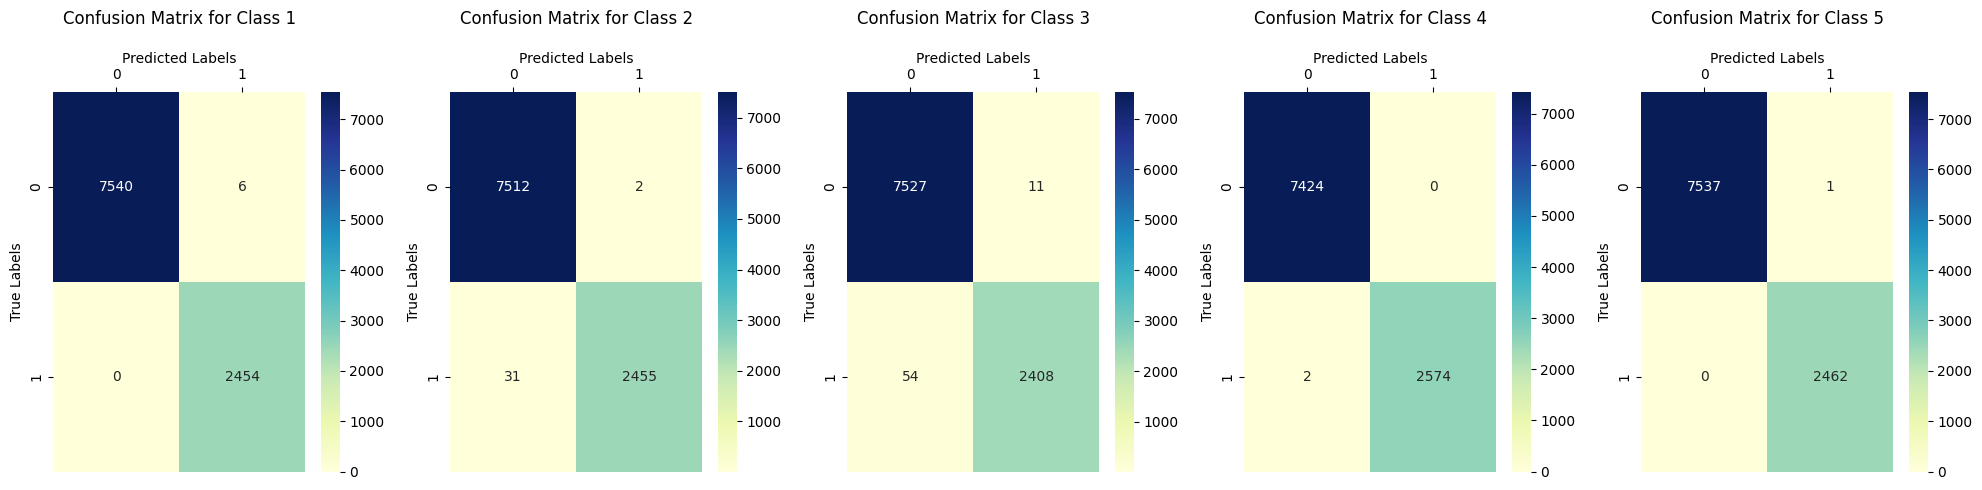

In [25]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrices(y_test, thresholded_preds):
    # Generate confusion matrices for each class
    confusion_matrices = multilabel_confusion_matrix(y_test, thresholded_preds)

    # Setting up the subplot for each confusion matrix
    fig, axes = plt.subplots(1, len(confusion_matrices), figsize=(20, 5))

    # Iterate over each confusion matrix and plot it
    for i, matrix in enumerate(confusion_matrices):
        # Plotting the confusion matrix on the respective subplot
        ax = axes[i]
        sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
        ax.set_title(f"Confusion Matrix for Class {i+1}", pad=20)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')

        # Improving the aesthetics
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()

    # Adjusting layout for better readability
    plt.tight_layout()
    plt.show()

# Example usage of the function
plot_confusion_matrices(y_test, thresholded_preds)

## Independent Models for Each Class

Training separate models for each class, as demonstrated in the given code snippet, is a strategy known as "One-vs-All" (OvA) or "One-vs-Rest" (OvR). This approach involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This section discusses the advantages and disadvantages of such an approach.

### Advantages of Independent Class Models:

1. **Simplicity**: Each model needs to only learn to distinguish between two classes: the class of interest and all other classes combined. This can simplify the learning problem, especially if the classes are highly imbalanced.

2. **Specialization**: Independent models allow for the specialization of features and decision boundaries for each class. This can be particularly advantageous when different classes have very distinct characteristics.

3. **Parallelization**: Training models independently for each class allows for parallelization, potentially reducing training time significantly if sufficient computational resources are available.

4. **Flexibility**: It is easier to add new classes or update models for specific classes without retraining the entire multi-class model.

5. **Customization**: Different classes might require different model architectures or hyperparameters, which is easily manageable when training separate models.

### Disadvantages of Independent Class Models:

1. **Resource Intensive**: Training a model for each class can be computationally expensive and memory-intensive, especially as the number of classes grows.

2. **Inconsistency**: There may be inconsistency in performance across different models, with some classes potentially having much better or worse classifiers than others.

3. **Class Imbalance**: If the dataset has a significant class imbalance, the models for minority classes may not perform as well due to fewer positive training samples.

4. **Redundancy**: There can be redundancy in learning when separate models learn similar features independently. This can be inefficient compared to a single model learning shared features across all classes.

5. **Integration Complexity**: Combining predictions from all the independent models into a final multi-class prediction can be complex and may require additional decision rules or calibration.

6. **Scalability Issues**: As the number of classes increases, the number of models to maintain and update grows linearly, which can become unmanageable.

### Summary:

While training independent models for each class can provide a tailored approach to classification, it may not always be the most efficient


In [26]:
# imodels = []
# ihistories = []
# for i in range(y_train.shape[1]):
#     print(f"Training model for Defect {i+1}")
#     imodel = build_model(X_train.shape[1:], X_train_features.shape[1:], 1)
#     iearly_stopping = EarlyStopping(monitor='val_loss', patience=5)
#     imodel_checkpoint = ModelCheckpoint(f'best_model_defect_{i+1}.h5', save_best_only=True)
#     # Training the model for the current defect class
#     ihistory = imodel.fit(
#         [X_train, X_train_features], y_train[:, i],  # Train only on the current defect class
#         epochs=20,
#         batch_size=32,
#         validation_split=0.2,
#         callbacks=[iearly_stopping, imodel_checkpoint]
#     )
#     imodels.append(imodel)
#     ihistories.append(ihistory)

## Challenges with Independent Models for Each Class

After implementing separate models for each class and evaluating their performance, we've observed that the confusion matrices indicate worse performance compared to a single multi-class model. Additionally, the computational time has increased. These outcomes can be attributed to several factors that are worth summarizing:

### Data Complexity

1. **Feature Overlap**: When classes share similar features, independent models may struggle to distinguish between them, leading to increased false positives and false negatives.

2. **Inadequate Model Specialization**: Each model may not have sufficiently specialized to its respective class, possibly due to the complexity or subtlety of the distinguishing features.

3. **Insufficient Training Data**: For some classes, there may not be enough data to train robust models, leading to poor generalization on the test set.

### Computational Time

1. **Increased Training Overhead**: Training multiple models means repeating the entire training process for each class, which naturally leads to longer overall training times.

2. **Resource Utilization**: Each model requires a separate allocation of computational resources, and when these resources are limited, it can lead to longer training times due to the inability to parallelize effectively.

3. **Model Optimization**: The need to fine-tune and optimize each model separately adds to the computational burden, especially if the hyperparameters that work for one class do not work for another.

### Summary

The increase in model complexity and computational time without an improvement in performance suggests that training separate models for each class may not be the optimal strategy for this particular dataset. 


In [27]:
# iall_predictions = []
# for i, imodel in enumerate(imodels):
#     imodel.load_weights(f'best_model_defect_{i+1}.h5')
#     ipredictions = imodel.predict([X_test, X_test_features])
#     ithresholded_preds = (ipredictions > 0.5).astype(int)
#     iall_predictions.append(ithresholded_preds)
#     itrue_labels = y_test[:, i]
# iall_predictions = np.array(iall_predictions).squeeze().T  
# plot_confusion_matrices(y_test, iall_predictions)

## 2.Root Cause Analysis

Root cause analysis (RCA) is a cornerstone in ensuring product quality and process efficiency. In the context of candy manufacturing, understanding the underlying reasons for defects is as crucial as detecting these defects.

### Comprehensive Problem Solving
- **Accurate Diagnosis**: RCA helps in pinpointing the exact stage or parameter causing defects, enabling targeted interventions.
- **Preventive Measures**: By identifying the root causes, preventive strategies can be formulated, reducing the recurrence of defects.

### Cost-Effectiveness
- **Reduced Waste**: Understanding and rectifying the root cause minimizes waste production.
- **Efficiency Optimization**: RCA optimizes production processes, reducing unnecessary costs.

## Conclusion
This project transcends beyond mere defect detection; it ventures into the realm of understanding and rectifying the core issues in the manufacturing process. By combining predictive analytics with root cause analysis, we aim not only to enhance the quality of the candies produced but also to streamline the production process, making it more efficient and cost-effective. The ultimate goal is to achieve a balance between high-quality outputs and optimized manufacturing processes.

In [70]:
def get_misclassified_examples(model, X_test, X_test_features, y_test):
    predictions = model.predict([X_test, X_test_features])
    thresholded_preds = (predictions > 0.5).astype(int)  # Apply the threshold to get binary predictions

    combined_misclassified_info = []

    for i, (pred, actual) in enumerate(zip(thresholded_preds, y_test)):
        if not np.array_equal(pred, actual):
            misclassified_classes = [j for j, (p, a) in enumerate(zip(pred, actual)) if p != a]
            
            combined_misclassified_info.append({
                'index': i,
                'actual': actual.tolist(),  # Convert numpy array to list
                'predicted': pred.tolist(),  # Convert numpy array to list
                'misclassified_classes': misclassified_classes
            })

    return combined_misclassified_info

# Usage of the function
misclassified_info = get_misclassified_examples(model, X_test, X_test_features, y_test)

# To print the first 5 misclassified examples with detailed info:
for info in misclassified_info[:5]:
    print(f"Index: {info['index']}, "
          f"Actual: {info['actual']}, "
          f"Predicted: {info['predicted']}, "
          f"Misclassified Classes: {info['misclassified_classes']}")

print(f"Total combined misclassified examples: {len(misclassified_info)}")


  1/313 [..............................] - ETA: 14s

313/313 [==============================] - 3s 9ms/step
Index: 89, Actual: [False, True, True, False, False], Predicted: [0, 1, 0, 0, 0], Misclassified Classes: [2]
Index: 224, Actual: [False, False, True, False, False], Predicted: [0, 0, 0, 0, 0], Misclassified Classes: [2]
Index: 249, Actual: [False, True, False, True, True], Predicted: [0, 0, 0, 1, 1], Misclassified Classes: [1]
Index: 421, Actual: [False, False, True, False, True], Predicted: [0, 0, 0, 0, 1], Misclassified Classes: [2]
Index: 582, Actual: [False, True, True, False, True], Predicted: [0, 1, 0, 0, 1], Misclassified Classes: [2]
Total combined misclassified examples: 107


### Objective
It is crucial to not only achieve high accuracy but also to understand where and why the model fails. This understanding is essential for model refinement and to gain insights into potential issues in the manufacturing process.

- **Model Evaluation**: Identifying misclassified examples helps in evaluating the model's performance beyond standard accuracy metrics.
- **Pattern Recognition**: Understanding which classes are frequently misclassified can signal patterns or systemic issues in either the model or the manufacturing process.
- **Targeted Improvement**: The detailed information provided by this function allows for targeted model improvements and specific interventions in the manufacturing process.

### Overall Impact
By systematically identifying and analyzing misclassified examples, we can not only refine our model but also provide actionable insights to the manufacturing team to address specific issues in the candy production process, thus fulfilling the dual objectives of predictive accuracy and process optimization.


In [93]:
import contextlib
import io

@contextlib.contextmanager
def suppress_stdout():
    with io.StringIO() as stringio:
        with contextlib.redirect_stdout(stringio):
            yield

def calculate_sorted_misclassified_examples(misclassified_info, model, X_test, X_test_features):
    sorted_misclassified_per_class = {}

    for info in misclassified_info:
        index = info['index']
        actual = info['actual']
        misclassified_classes = info['misclassified_classes']

        with suppress_stdout():
            raw_predictions = model.predict([np.expand_dims(X_test[index], axis=0), np.expand_dims(X_test_features[index], axis=0)])

        for cls in misclassified_classes:
            difference = abs(raw_predictions[0][cls] - actual[cls])

            if cls not in sorted_misclassified_per_class:
                sorted_misclassified_per_class[cls] = [(index, difference)]
            else:
                sorted_misclassified_per_class[cls].append((index, difference))

    for cls, examples in sorted_misclassified_per_class.items():
        examples.sort(key=lambda x: x[1], reverse=True)

    return sorted_misclassified_per_class

sorted_misclassified_per_class = calculate_sorted_misclassified_examples(misclassified_info, model, X_test, X_test_features)

It's not just about maintaining the high quality and consistency of the candy products, but also about understanding and rectifying the underlying causes of defects. By closely examining the misclassified examples, we gain insights into the effectiveness of the predictive model and identify areas for refinement.

### Overall Observation
The overall data shows a tendency towards significant prediction inaccuracies. This is indicated by the number of examples where the predicted class diverged notably from the actual class. 

### Class-Specific Analysis
- **Class 2**: Represents the bulk of the misclassified examples. The nature of defects in this class might be more complex or less consistent, making accurate prediction challenging. Some of this data is so different it was either completely forgotten during learning process or new class/defect should be introduced.
- **Class 1**: Also exhibits a substantial number of misclassified instances, though less than Class 2. It suggests that certain defect patterns in Class 1 are not being captured effectively by the model.
- **Class 0**: Shows fewer misclassified examples, indicating relatively better prediction accuracy. However, the small sample size might be a factor in this observation.
- **Classes 3 and 4**: Have very few examples, which limits the ability to draw definitive conclusions about the model's performance for these classes. There is so little data that we can assume there are outliers.

### Conclusion
The analysis reveals a pronounced variation in the model's prediction accuracy across different defect classes. Classes with higher numbers of misclassified examples (like Class 2 and Class 1) indicate areas where the model could be improved for better accuracy. The variability in prediction accuracy across classes underscores the need for continuous monitoring and refinement of the predictive model, especially for those classes where it currently underperforms. This ongoing process of analysis and improvement is crucial for maintaining the high standards of quality in candy manufacturing.


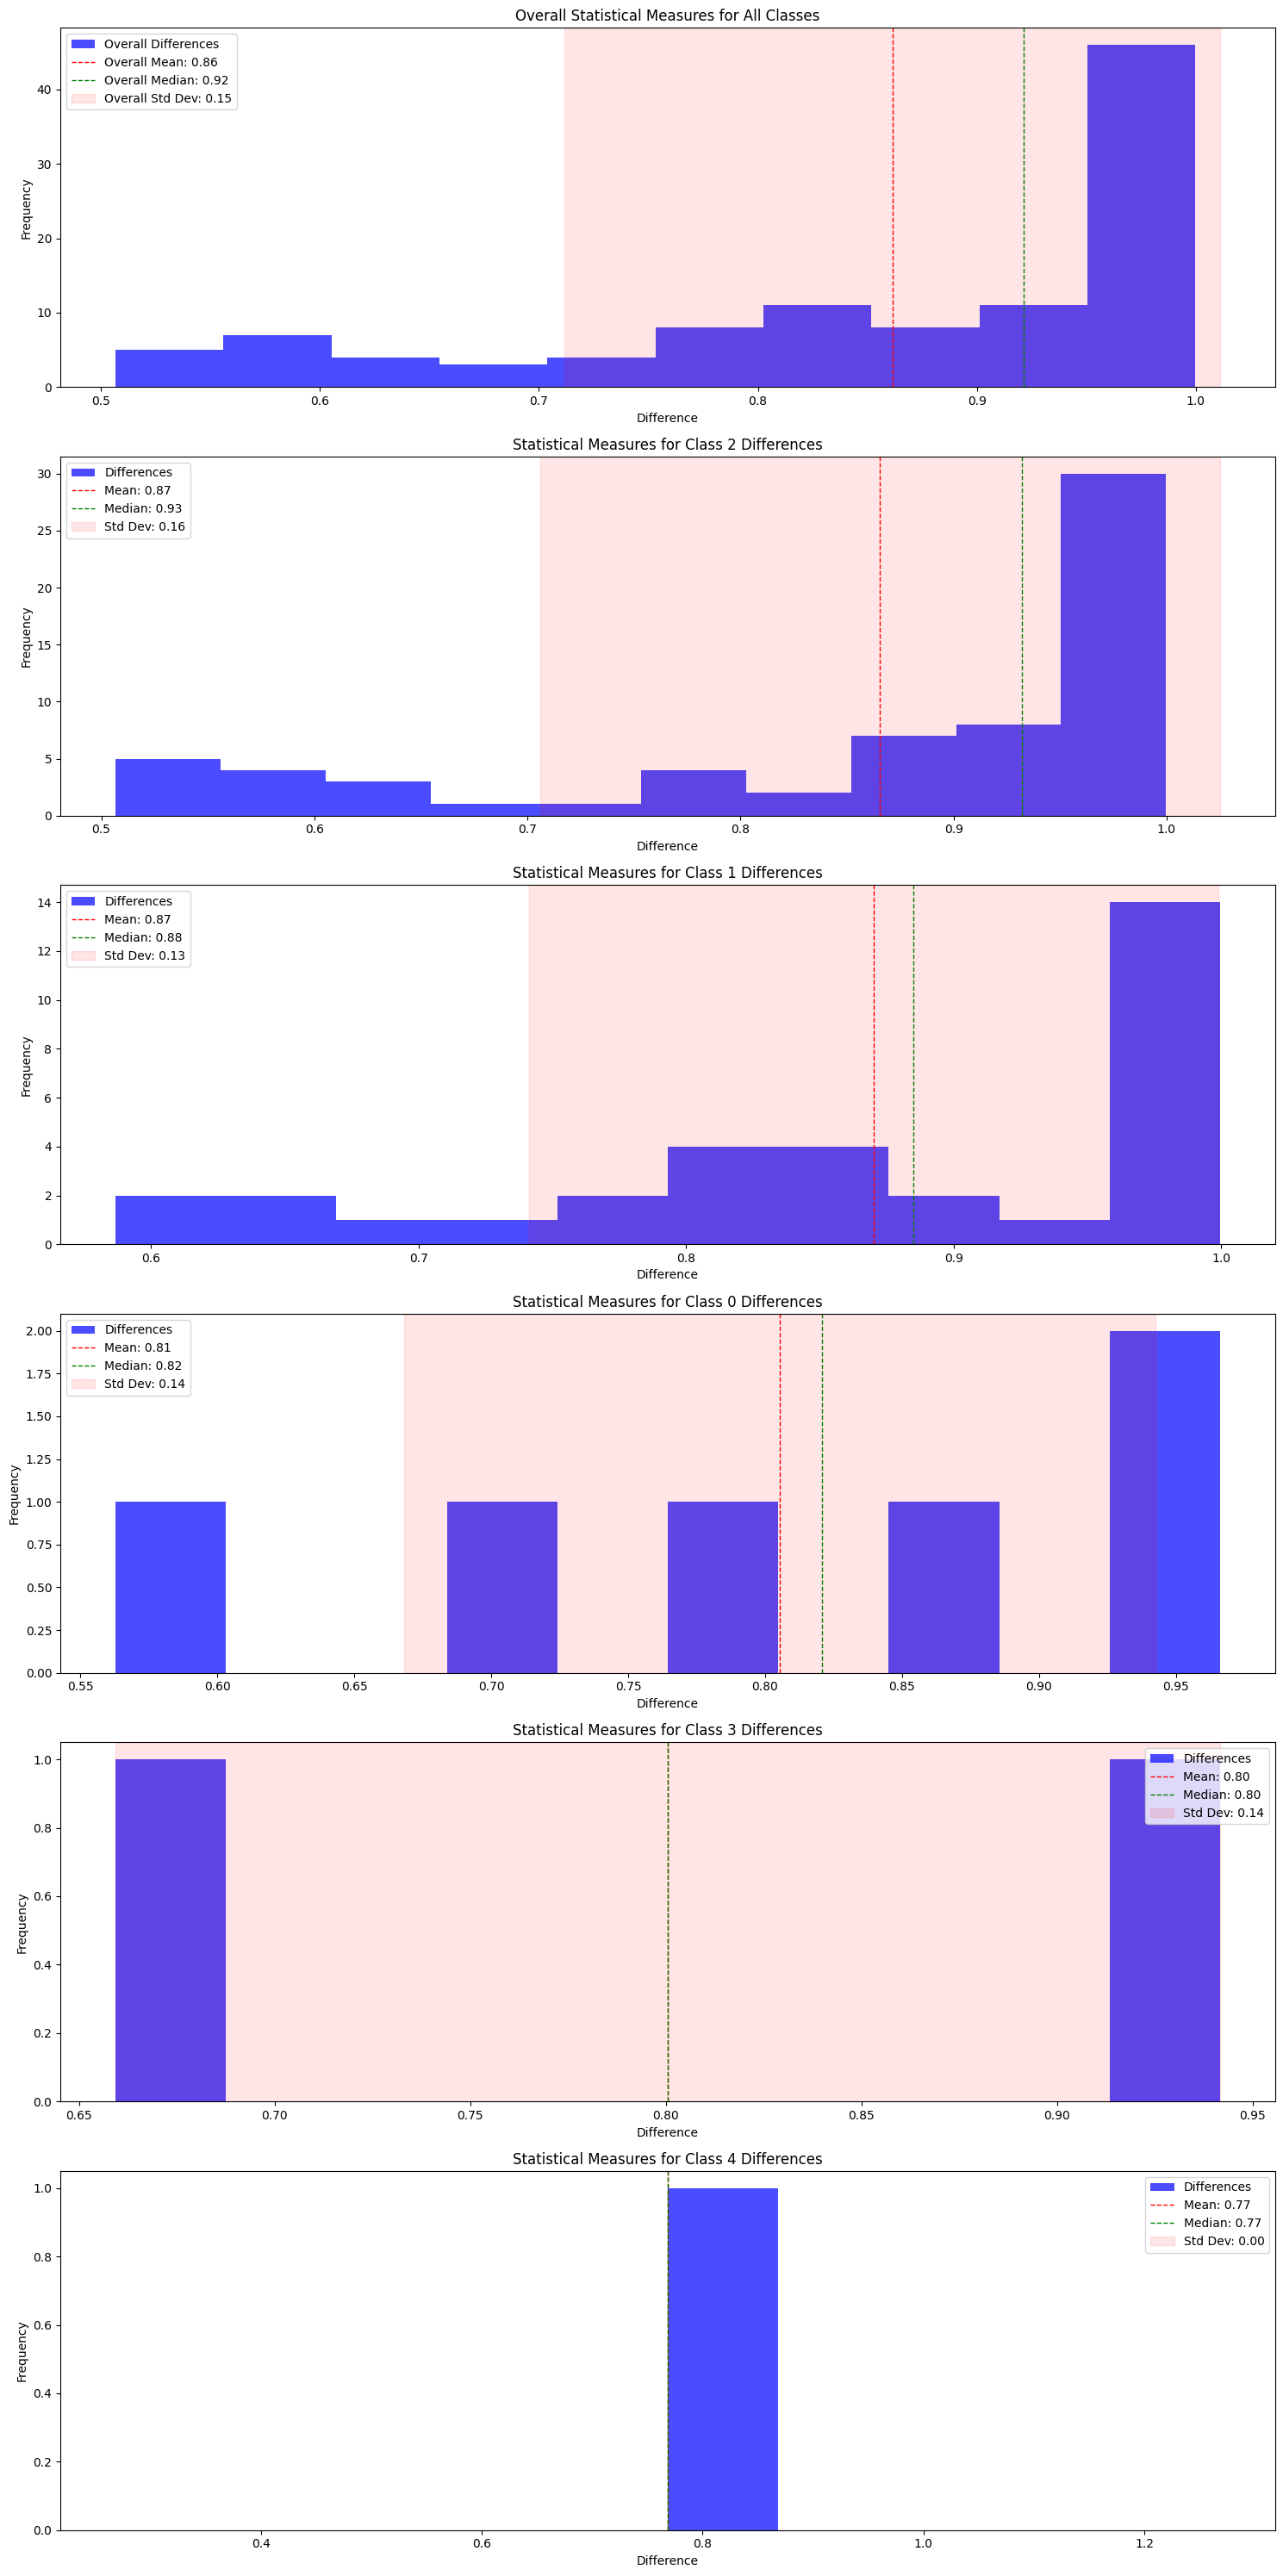

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_statistical_measures_with_overall(worst_classified_per_class):
    num_classes = len(worst_classified_per_class)
    plt.figure(figsize=(15, 5 * (num_classes + 1)))  # Adjust for an additional plot

    # Combine all differences for the overall plot
    all_differences = []
    for _, examples in worst_classified_per_class.items():
        all_differences.extend([diff for _, diff in examples])

    # Calculate overall statistical measures
    overall_mean = np.mean(all_differences)
    overall_median = np.median(all_differences)
    overall_std = np.std(all_differences)

    # Overall plot
    plt.subplot(num_classes + 1, 1, 1)
    plt.hist(all_differences, bins=10, color='blue', alpha=0.7, label='Overall Differences')
    plt.axvline(overall_mean, color='red', linestyle='dashed', linewidth=1, label=f'Overall Mean: {overall_mean:.2f}')
    plt.axvline(overall_median, color='green', linestyle='dashed', linewidth=1, label=f'Overall Median: {overall_median:.2f}')
    plt.axvspan(overall_mean - overall_std, overall_mean + overall_std, color='red', alpha=0.1, label=f'Overall Std Dev: {overall_std:.2f}')
    plt.title('Overall Statistical Measures for All Classes')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    plt.legend()

    # Individual class plots
    for i, (cls, examples) in enumerate(worst_classified_per_class.items(), 2):
        # Extract differences
        differences = [diff for _, diff in examples]

        # Calculate statistical measures
        mean_diff = np.mean(differences)
        median_diff = np.median(differences)
        std_diff = np.std(differences)

        # Create subplot for each class
        plt.subplot(num_classes + 1, 1, i)
        plt.hist(differences, bins=10, color='blue', alpha=0.7, label='Differences')
        plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_diff:.2f}')
        plt.axvline(median_diff, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_diff:.2f}')
        plt.axvspan(mean_diff - std_diff, mean_diff + std_diff, color='red', alpha=0.1, label=f'Std Dev: {std_diff:.2f}')
        plt.title(f'Statistical Measures for Class {cls} Differences')
        plt.xlabel('Difference')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_combined_statistical_measures_with_overall(sorted_misclassified_per_class)

## Data Manipulation Functions

In our analysis, we use several functions to manipulate specific sections of the data, which is crucial for understanding the impact of these sections on the predictions of our model.

1. **`interpolate_section`**: Linearly interpolates a specified section of the time series, using linear interpolation between points just outside the section. For edge cases, it extends the nearest value across the section.
   
2. **`randomize_section`**: Replaces a section of the time series with random values, simulating random fluctuations for each channel in the specified section.

3. **`remove_and_concatenate`**: Removes a segment from the time series and concatenates the remaining parts. Depending on the segment's position, it either joins the preceding and following parts or keeps only one part if the segment is at an edge.

4. **`maximize_minimize_section`**: Sets a section of the time series to its maximum or minimum value, filling the specified section with either the maximum or minimum value found in the entire series, based on the `maximize` parameter.

5. **`zero_section`**: Sets a section of the time series to zero, effectively nullifying the impact of values in that section.

6. **`set_mean_section`**: Replaces a section of the time series with its mean value, calculating and applying the mean of the specified section across it.

These functions systematically alter parts of the time series data, enabling us to identify sections that significantly influence the model's defect detection predictions. This approach helps us better understand the relationship between specific data patterns and the occurrence of defects in the manufacturing process. 

In [30]:
def interpolate_section(x, start, end):
    x = x.copy()
    for channel in range(x.shape[1]):
        # Use the points just outside the window for interpolation
        if start != 0 and end != len(x):
            x_interp = interp1d([start-1, end], [x[start-1, channel], x[end, channel]], kind='linear')
            x[start:end, channel] = x_interp(np.arange(start, end))
        elif start == 0:
            x[start:end, channel] = x[end, channel]
        else:
            x[start:end, channel] = x[start-1, channel]
    return x

def randomize_section(x, start, end):
    for channel in range(x.shape[1]):
        x[start:end, channel] = np.random.rand(end - start)
    return x

def remove_and_concatenate(x, start, end):
    if start == 0:
        return x[end:]
    elif end == len(x):
        return x[:start]
    else:
        return np.concatenate((x[:start], x[end:]))

def maximize_minimize_section(x, start, end, maximize=True):
    # Set to maximum or minimum value within a range
    max_val = np.max(x) if maximize else np.min(x)
    x[start:end] = max_val
    return x

def zero_section(x, start, end):
    x[start:end] = 0
    return x

def set_mean_section(x, start, end):
    x[start:end] = np.mean(x[start:end], axis=0)
    return x

### Visualization and Frequency Analysis
The function `process_misclassified_example` visualizes the identified problematic areas, highlighting them on the time series plots. The intensity of the highlighted areas corresponds to the frequency of their selection as influential by the different techniques, providing a visual representation of the most critical segments in the data.

### Selection of Top Worst Classified Examples
We focus our analysis on the most challenging cases for the model by selecting the top worst-classified examples for each defect class, as determined by the function `get_top_worst_classified_examples`. This targeted approach allows us to concentrate on the cases where the model's performance deviates most significantly from the expected outcomes, providing valuable insights into the model's behavior and the data characteristics.

### Conclusion
This comprehensive approach, combining predictive modeling with detailed root cause analysis, not only enhances our understanding of the model's performance but also sheds light on the key factors contributing to product defects in the manufacturing process. Such insights are invaluable for refining the model and implementing preventive measures in the production line to reduce defects and improve product quality.

Class 2 - Top 3 Worst Classified Examples


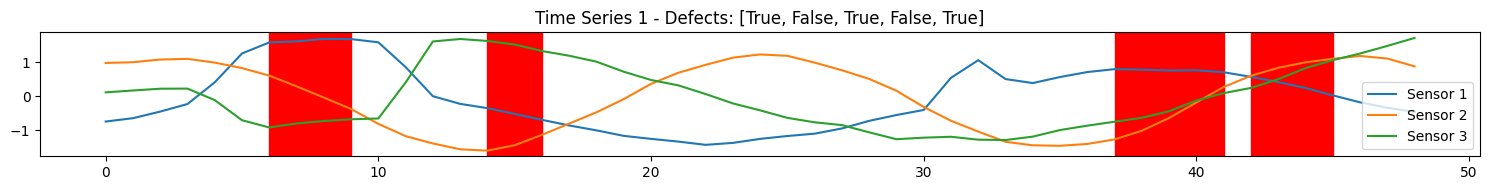

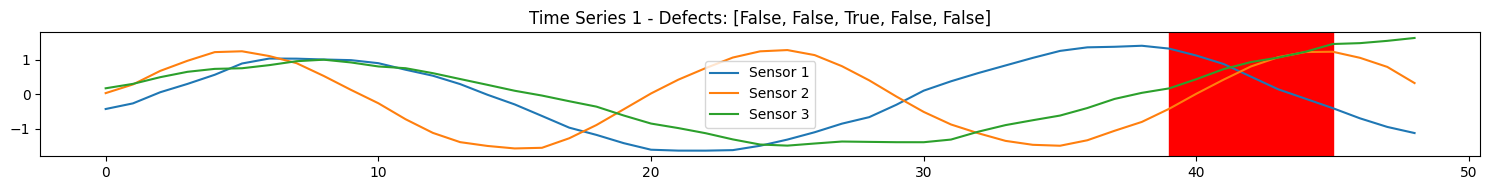

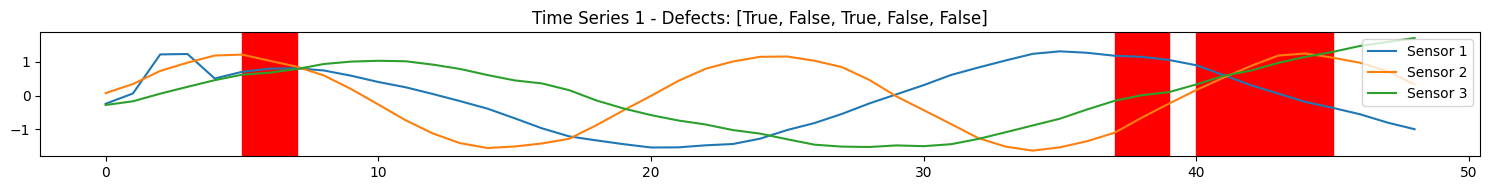

Class 1 - Top 3 Worst Classified Examples


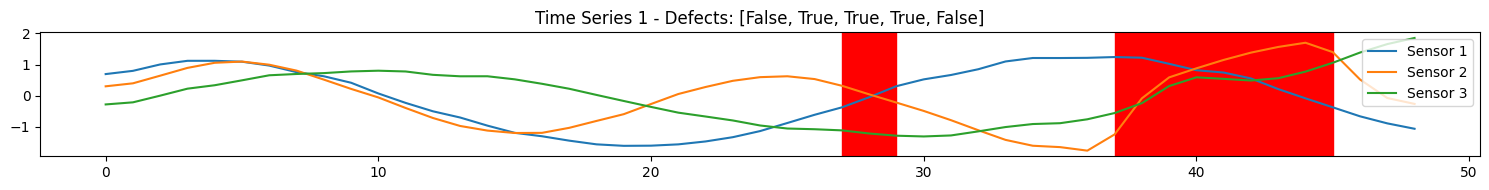

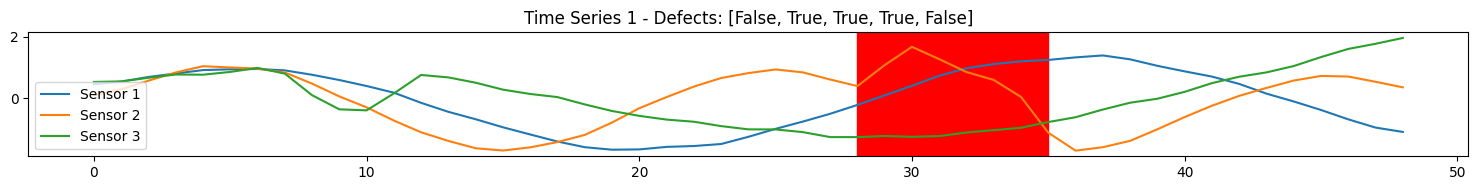

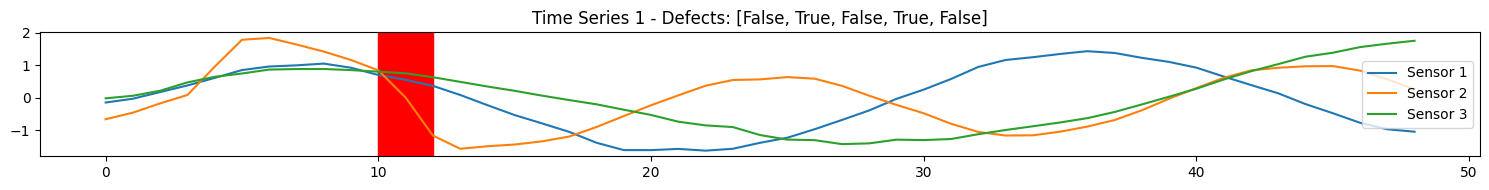

Class 0 - Top 3 Worst Classified Examples


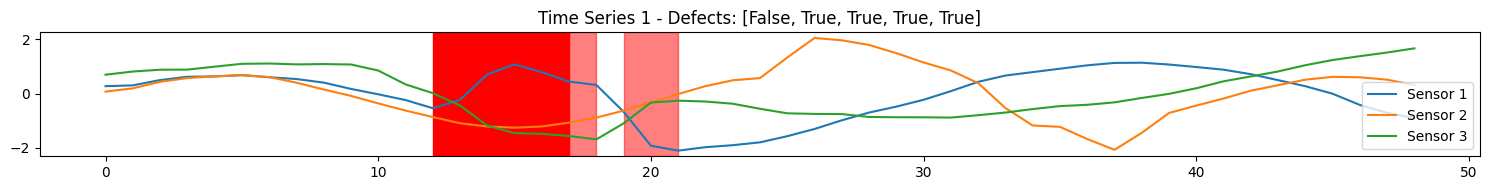

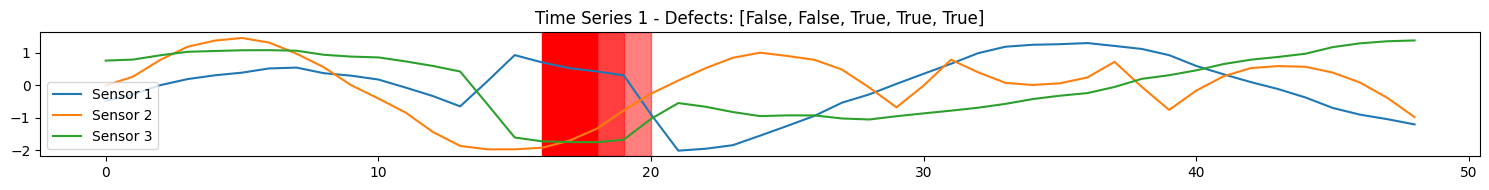

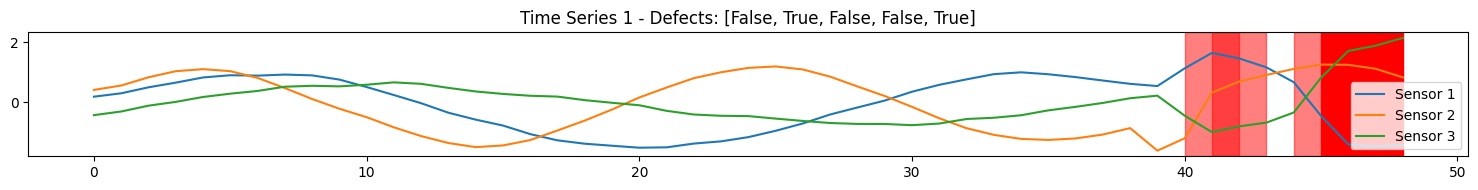

Class 3 - Top 2 Worst Classified Examples


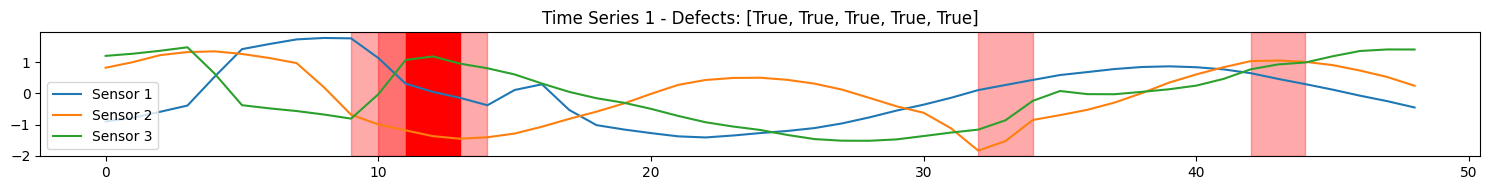

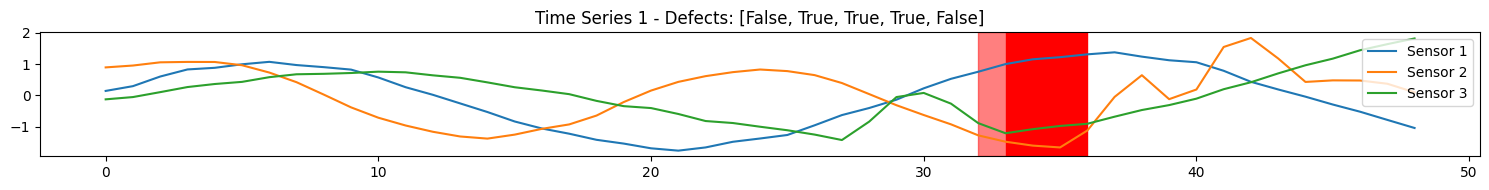

Class 4 - Top 1 Worst Classified Examples


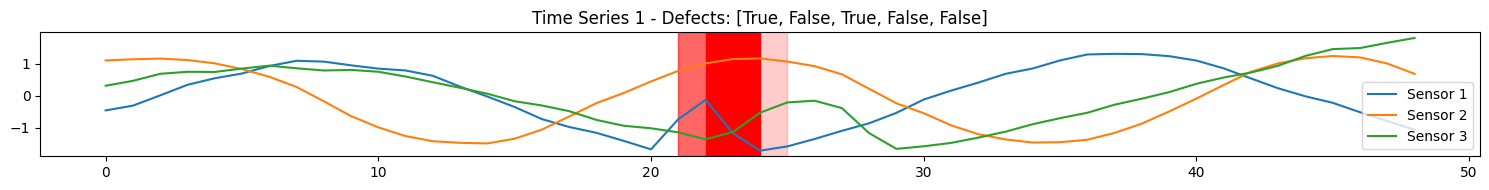

In [105]:
def find_problematic_areas(model, x, x_features, y_test, misclassified_class, step=0.01):
    length = x.shape[0]
    window_size = int(length * 0.05)
    reshaped_x_features = np.expand_dims(x_features, axis=0)

    techniques = {
        "Zeroing": lambda x, s, e: zero_section(x, s, e),
        "Removal": remove_and_concatenate,
        "Mean": set_mean_section,
        "Maximization": lambda x, s, e: maximize_minimize_section(x, s, e, maximize=True),
        "Minimization": lambda x, s, e: maximize_minimize_section(x, s, e, maximize=False),
        "Interpolation": interpolate_section,
        "Randomization": randomize_section
    }

    all_areas = []

    for start in range(0, length - window_size):
        end = start + window_size

        for technique_name, technique_func in techniques.items():
            modified_x = technique_func(x.copy(), start, end)
            reshaped_modified_x = np.expand_dims(modified_x, axis=0)
            with suppress_stdout():
                modified_prediction = model.predict([reshaped_modified_x, reshaped_x_features])
            difference = np.abs(y_test[0][misclassified_class] - modified_prediction[0][misclassified_class])
            all_areas.append((technique_name, (start, end), difference))

    # Sort all areas by difference and select the top 10%
    all_areas.sort(key=lambda x: x[2])
    top_count = max(1, len(all_areas) // 10)  # Select top 10% or at least 1
    top_areas = all_areas[:top_count]

    return top_areas

def process_misclassified_example(model, x_test, x_test_features, misclassified_info, index, plot_func):
    example = misclassified_info[index]
    x = x_test[example['index']]
    x_features = x_test_features[example['index']]
    y_test = np.array([example['actual']])
    misclassified_class = example['misclassified_classes'][0]

    top_areas = find_problematic_areas(model, x, x_features, y_test, misclassified_class)

    # Compute frequency of each area
    area_counts = {}
    for _, area, _ in top_areas:
        area_counts[area] = area_counts.get(area, 0) + 1

    # Extract only the area tuples for plotting
    area_tuples = list(area_counts.keys())

    # print(f"Example {index} - Misclassified Class Index: {misclassified_class}")
    # for technique, area, diff in top_areas:
    #     print(f"Technique: {technique}, Area: {area}, Difference: {diff}")

    plot_func([x], [example['actual']], num_series=1, problematic_areas=area_tuples, area_counts=area_counts)

def get_top_worst_classified_examples(sorted_misclassified_per_class, top_n=3):
    top_worst_classified_per_class = {}

    for cls, examples in sorted_misclassified_per_class.items():
        top_worst_classified_per_class[cls] = examples[:min(top_n, len(examples))]

    return top_worst_classified_per_class

# Usage
top_worst_classified_per_class = get_top_worst_classified_examples(sorted_misclassified_per_class)

# Process misclassified examples
for cls, examples in top_worst_classified_per_class.items():
    print(f"Class {cls} - Top {len(examples)} Worst Classified Examples")
    for index, _ in examples:
        # Find the actual index in misclassified_info that matches this example
        actual_example_index = next((i for i, example in enumerate(misclassified_info) if example['index'] == index), None)
        if actual_example_index is not None:
            process_misclassified_example(model, X_test, X_test_features, misclassified_info, actual_example_index, plot_time_series)


## Analysis of Sensor Data Patterns Linked to Defects

### Class 2 Defects:
The occurrence of defects in Class 2 is closely associated with the intersection of sensor lines from various channels. A notable pattern here is that during these critical segments, the yellow and green sensor readings tend to increase, while the blue sensor reading shows a decrease. This simultaneous behavior of sensors, especially at intersection points, appears to be a reliable indicator of Class 2 defects.

### Class 1 Defects:
Defects in Class 1 are also linked to intersections of sensor lines. However, the key characteristic is the distinctly abnormal behavior of the yellow sensor readings. Unlike its usual pattern, the yellow line shows rapid and significant fluctuations in rate of change, deviating markedly from its typical trend. This aberrant behavior of the yellow sensor, particularly at points of line intersection, is indicative of Class 1 defects.

### Class 0 Defects:
Class 0 defects are consistently associated with an uncharacteristic and simultaneous increase in blue sensor readings and a decrease in green sensor readings. This pattern often presents as a symmetrical inversion of the two sensor lines, suggesting a specific and identifiable anomaly leading to Class 0 defects.

### Class 3 Defects:
The occurrence of Class 3 defects is linked to a sudden drop in either the green or blue sensor readings. This rapid decrease occurs without corresponding changes in the standard behavior of the sensor lines. The absence of other changes, combined with these abrupt decreases, signals a Class 3 defect.

### Class 4 Defects:
For Class 4, the key to identifying defects lies in the behavior of the blue sensor. The pattern typically starts with a slight increase in the blue sensor value, which is then followed by a rapid and steep decline. This specific fluctuation in the blue sensor readings is characteristic of Class 4 defects.

In summary, each class of defects is associated with unique and identifiable patterns in sensor data. Understanding these patterns is crucial for effective defect detection and prevention in the manufacturing process.

## Next Steps for Project Enhancement

### 1. Root Analysis of Singular Channels:
The focus will be on a detailed analysis of individual sensor channels, aiming to decipher the intricate interplay between different channels that lead to defects. This in-depth examination is crucial for pinpointing specific triggers and patterns that are critical in identifying and addressing the root causes of various defects.

### 2. Clustering of Problematic Areas:
Employing clustering techniques, through either classical methods or deep learning algorithms, is essential to group similar segments of sensor data indicating defects. This strategy will reveal underlying patterns and commonalities in these problematic areas, providing insights into the real causes of defects and the correlation of different sensor behaviors with specific types of defects.

### 3. Iterative Model Refinement:
Continuous refinement of the predictive model is necessary. This includes exploring different architectural choices and updating the model with new data and insights. Such iterative refinement ensures the model's effectiveness and adaptability in accurately classifying defects.

### 4. Real-Time Monitoring and Feedback Loop:
Implementing a real-time monitoring system integrated with our model on the production line will significantly enhance defect detection. Establishing a feedback loop for immediate process adjustments based on the model's outputs can lead to prompt corrective actions, thus improving the quality and efficiency of the production process.

These steps are aimed at not only advancing our understanding of defect formation in manufacturing processes but also developing a sophisticated, accurate, and flexible solution for ongoing defect detection and prevention.